In [1]:
"""
Find all groundtruth instances where catfish fails, and where 
"""
# [1] COLLECT ALL GROUND TRUTH DATA
from parse_truth_ALL import main as parse_truth_all
import collections

datadir = '/home/kyle/data/rnaseq/mouse/'
froot = 'mouse'

show_flag = False
# Given list of gt filename-instancenum pairs, aggregate dictionary:
# key = 'filename instancenum'
# val = ground truth path decomp info (weights and paths)
gt_pathset_dict = parse_truth_all(datadir)

In [2]:
# [2] GET CATFISH INFO
from algorithm_output_parser import catfish_output_parser
catfish_results_file = '../catfish-comparison/catfish-log-' + froot + '.txt'
all_catfish_paths = catfish_output_parser(catfish_results_file, gt_pathset_dict, verbose=False)

In [3]:
# [3] GET TOBOGGAN INFO
from algorithm_output_parser import toboggan_output_parser
toboggan_results_file = './data/' + froot + '-master-file.txt'
all_toboggan_paths = toboggan_output_parser(toboggan_results_file, gt_pathset_dict, verbose=False)

In [10]:
def get_stats(set1, set2):
    if set1 == set2:
        return 1.0, True
    elif len(set1) == 0:
        return 1.0, False
    return len(set1.intersection(set2)) / len(set1), False
        
data_catfish = []
data_toboggan = []
for key, gt_path in gt_pathset_dict.items():
    gt_size = len(gt_path)
    cat_recall, cat_identical = get_stats(gt_path, all_catfish_paths[key])
    tob_recall, tob_identical = get_stats(gt_path, all_toboggan_paths[key])
    if not cat_identical:
        data_catfish.append( (gt_size, cat_recall) )
    if not tob_identical:
        data_toboggan.append( (gt_size, tob_recall) )

In [29]:
import numpy
import matplotlib.pyplot as plt
import collections

figurename = 'alg-recall-'
alg_names = ['catfish', 'toboggan']
colors = ['red', 'blue']

plt.close()
plt.clf()

sizes_cat, data_cat = zip(*data_catfish)
sizes_tob, data_tob = zip(*data_toboggan)

ax = fig.add_subplot(111)
ax.boxplot( [data_cat, data_tob] )

ax.title('Recall on ground truth of {}'.format(froot))
ax.set_ylabel('recall of algorithm output')
ax.set_xticklabels(alg_names)
# ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])
# fig.tight_layout()

show_flag = True
if show_flag:
    plt.show()
else:
    plt.savefig( './figures/' + ''.join([figurename, froot, '.eps']), format='eps', dpi=300)
    plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
plt.close()
print("Done with plot {}".format(figurename))



TypeError: 'Text' object is not callable

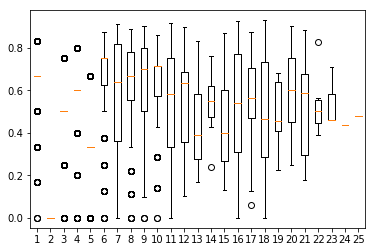

Done with plot alg-recall-


In [20]:
# import numpy
# import matplotlib.pyplot as plt
# import collections

# figurename = 'alg-recall-'
# alg_names = ['catfish', 'toboggan']
# colors = ['red', 'blue']

# def get_width(num_datapoints):
#     return 0.18*numpy.log10(num_datapoints)


# plt.close()
# plt.clf()

# fig, ax1 = plt.subplots()
# fig_alg = {}
# max_label = 0

# temp = collections.defaultdict(list)
# input_data = data_catfish
# for soln_size, soln_recall in input_data:
#     temp[soln_size].append(soln_recall)

# labels = []
# data = []
# for label, array in temp.items():
#     labels.append(labels)
#     data.append(array)

# plt.boxplot( data )

# for which_alg in all_stats:
#     print(" {} with # data points {} ".format(alg_names[which_alg], len(all_stats[which_alg])) )
#     # all_stats.append( [len(gt_pathset), len(catfish_pathset), this_jaccard_value, this_intersect, gap] )
#     stats = all_stats[which_alg]
#     inds_identical = indices_identical[which_alg]
#     inds_timeouts = indices_timeout[which_alg]

#     data1 = numpy.array(stats[:,0])  # size of ground truth pathset
#     data2 = numpy.array(stats[inds_identical, 0])  # size of ground truth pathset when algorithm identical

#     data1_counter = collections.Counter([ x[0] for x in data1 ])
#     data2_counter = collections.Counter([ x[0] for x in data2 ])

#     data1_counter = collections.Counter([ x[0] for x in data1 ])
#     data2_counter = collections.Counter([ x[0] for x in data2 ])

#     data = []
#     soln_sizes = []
#     num_datapoints = []
#     widths = []
#     for soln_size, x in data1_counter.items():
#         y = data2_counter[soln_size]
#         if x != 0:
#             data.append(y/x)
#             num_datapoints.append(int(x))
#             soln_sizes.append(int(soln_size))
#             widths.append(get_width(x))
#             if y != 0:
#                 max_label = max( max_label, int(soln_size) )

#     ax1.scatter(soln_sizes, data, color=colors[which_alg], label=alg_names[which_alg], alpha=0.5)

# plt.title("Algorithms, success on {}".format(froot))
# plt.xlabel("Ground truth decomposition size")
# ax1.set_ylabel("proportion of instances: output = GT", color='purple')
# ax1.set_ylim([0,1])
# ax1.tick_params('y', colors='purple')

# # get all ground truth sizes
# soln_sizes = [ (int(soln_size), int(count)) for soln_size, count in \
#               collections.Counter([ x[0] for x in \
#                                    numpy.array(all_stats[0][:,0]) ]).items() if count != 0 ]         
# soln_sizes, num_datapoints = zip(*soln_sizes)

# plt.xticks( range(1, int(max(soln_sizes)+1)) )
# ax2 = ax1.twinx()
# ax2.bar(list(soln_sizes), list(num_datapoints), color='grey', alpha=0.33)
# ax2.set_ylabel('Num instances', color='grey')
# ax2.set_yscale("log")
# ax2.tick_params('y', colors='grey')

# ax1.legend(loc='upper right', frameon=False)#, handles=ax1, labels=alg_names)
# fig.tight_layout()

# show_flag = True

# if show_flag:
#     plt.show()
# else:
#     plt.savefig( './figures/' + ''.join([figurename, froot, '.eps']), format='eps', dpi=300)
#     plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
# plt.close()
# print("Done with plot {}".format(figurename))